# Проект "Стримчик"

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### Откроем файл с данными и изучим общую информацию

In [39]:
import pandas as pd # импортируем библиотеку pandas
data = pd.read_csv('/datasets/games.csv')

**Выведем первые 10 строк датафрейма data на экран:**

In [40]:
display (data.head(10)) #вывод 10 первых строк

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Выведем основную информацию о датафрейме:**

In [41]:
data.info() #вывод информации о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Построим общую гистограмму для всех числовых столбцов таблицы:**

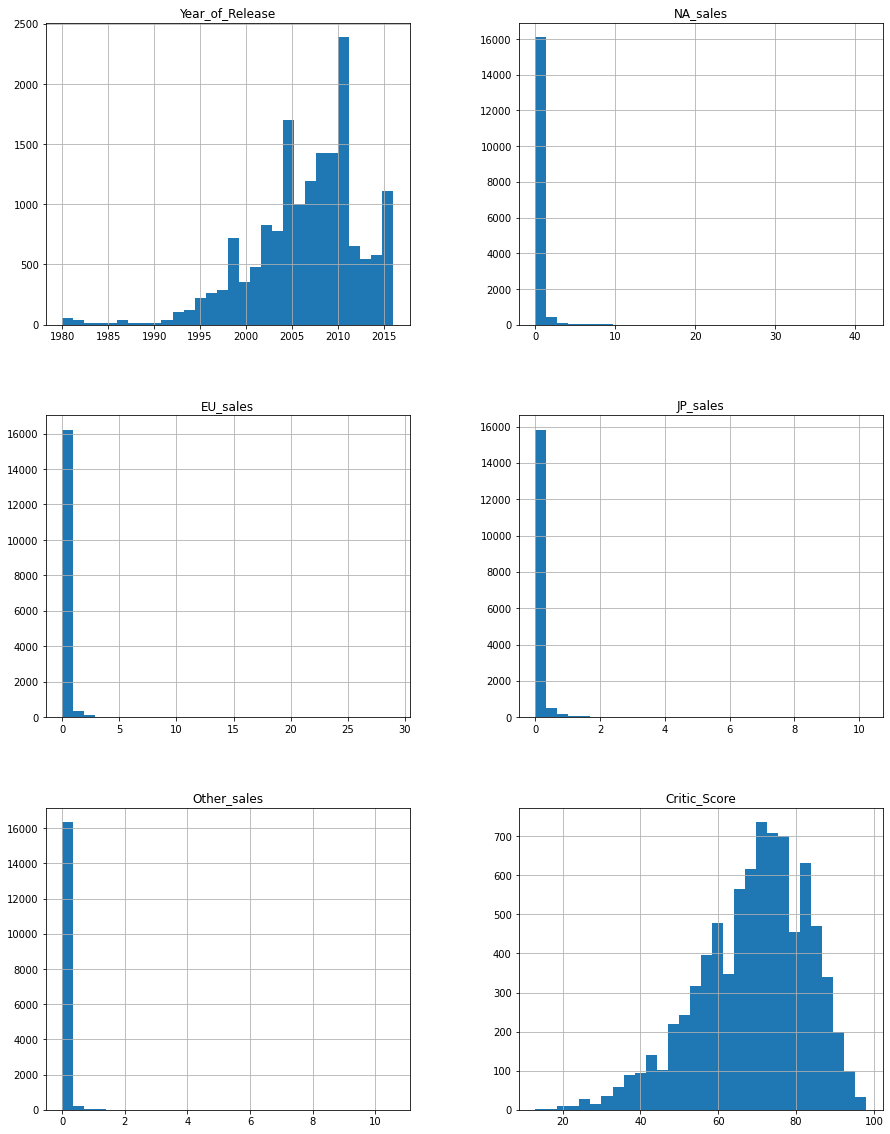

In [42]:
data.hist(bins=30, figsize=(15, 20)); #построение гистограмм по каждому столбцу

**Посчитаем количество явных дубликатов:**

In [43]:
data.duplicated().sum() #считаем дубликаты

0

**Выводы из части 1:**

1. В данных есть пропуски;
2. На некоторых графиках видны несколько пиков, что требует более подробного анализа;
3. Судя по большому размеру пустой области графиков, имеют место значения, сильно отличающиеся от большинства;
4. Некоторые значения могли бы иметь другой тип данных по смыслу;
5. Явные дубликаты в даннах отсутствуют.

### Предобработка данных

**Выведем на экран названия столбцов:**

In [44]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

**Заменим названия столбцов (приведём к нижнему регистру):**

In [45]:
data.columns = data.columns.str.lower()

**Заменим типы данных в столбцах 'year_of_release' и 'user_score', так как годам больше подходит целый тип данных, а оценке пользователей - с плавающей запятой:**

In [46]:
data['year_of_release'] = data['year_of_release'].astype('Int64') # заменяем тип данных столбца 'year_of_release'
data['year_of_release'].head() # проверим результат

0    2006
1    1985
2    2008
3    2009
4    1996
Name: year_of_release, dtype: Int64

**В столбце 'user_score' содержатся значения "tbd", что  значит "To Be Determined" (будет определено). Поэтому 
прежде, чем изменять тип данных заменим эти значения на пропуски:**

In [47]:
data.loc[data['user_score'] =="tbd",'user_score'] = 'NaN' # заменяем "tbd"
data['user_score'] = data['user_score'].astype('float64') # меняем тип столбца на float64
data.info() # проверим результат

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


**Выведем количество пропущенных значений для каждого столбца, отсортировнное по убыванию:**

In [48]:
print (data.isna().sum().sort_values(ascending = False))

user_score         9125
critic_score       8578
rating             6766
year_of_release     269
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64


1. В датафрейме достаточно много пропусков. 
2. Пропуски в основном находятся в столбцах, относящихся к рейтингам (critic_score, user_score, rating). 
3. Предположительно, пропуски в данных могут быть вызваны человеческим фактором, ошибками при выгрузке, либо сбоями в алгоритме заполнения некоторых полей. 
4. В некоторых столбцах, таких как "critic_score" пустых ячеек примерно столоько же, сколько и заполненных.

**Удалим строки с пропущенными значениями в столбцах year_of_release, name и genre. Их удаление не должно повлиять на выводы,
так как они составляют меньше 2% от общего числа строк, а в задании сказано: 'Не учитывайте в работе данные за предыдущие годы':**

In [49]:
data = data.query('year_of_release.notna() and name.notna() and genre.notna()') # удаляем пропуски в 3 столбцах
data.info() #проверим результат

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


**Заменим пропуски в столбце rating на "Unknown", так как рейтинг - признак категориальный, и пропуски можно считать еще одной категорией:**

In [50]:
data.loc[data['rating'].isna(),'rating'] = 'Unknown' # заменяем пропуски
data.info() # проверим результат

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


**Пропуски в столбцах critic_score и user_score решено оставить, так как их слишком много, и их заполнение может сильно исказить результат.**

**Добавим столбец с сумаррными продажами по всем регионам:**

In [51]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis = 1) # добавляем
data['total_sales'] # проверяем

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_sales, Length: 16444, dtype: float64

**Выводы из части 2:** <br>
Для подготовки данных к анализу было выполнено следющее:
   1. Изменены названия столбцов (приведены к нижнему регистру);
   2. Изменены типы данных в столбцах 'year_of_release' и 'user_score', так как годам больше подходит целый тип данных, а оценке пользователей - тип с плавающей запятой.
   3. В столбце 'user_score' содержались значения "tbd", что значит "To Be Determined" (будет определено). Поэтому прежде, чем изменять тип данных пришлось заменить эти значения на пропуски.
   4. Удалены строки с пропущенными значениями в столбцах year_of_release, name и genre. Их удаление не должно повлиять на выводы, так как они составляют меньше 2% от общего числа строк, а в задании сказано: 'Не учитывайте в работе данные за предыдущие годы'.
   5. Пропуски в столбце rating заменены на "Unknown", так как рейтинг - признак категориальный, и пропуски можно считать еще одной категорией.
   6. Пропуски в столбцах critic_score, user_score решено оставить, так как их слишком много, и их заполнение может сильно исказить результат.
   6. Добавлен столбец с сумаррными продажами по всем регионам.

### Проведём исследовательский анализ данных

**Посмотрим, сколько игр выпускалось в разные годы:**

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64


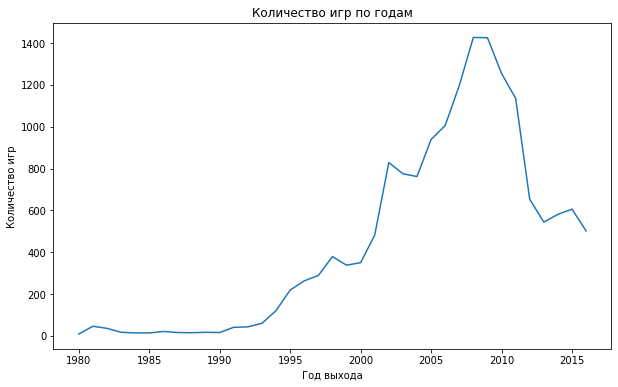

In [52]:
print(data.groupby(by = 'year_of_release')['year_of_release'].count()); #выводим таблицу
data.groupby(by = 'year_of_release')['year_of_release'].count().plot(figsize = (10,6), title = 'Количество игр по годам', xlabel = 'Год выхода', ylabel = 'Количество игр'); # выводим диаграмму по годам

**Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами:**

In [53]:
data.groupby(by = 'platform')['total_sales'].sum().sort_values(ascending = False) #выводим таблицу

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

**Построим распределение платформы PS2 по годам:** 

year_of_release
2000     39.17
2001    166.43
2002    205.38
2003    184.31
2004    211.81
2005    160.66
2006    103.42
2007     75.99
2008     53.90
2009     26.40
2010      5.64
2011      0.45
Name: total_sales, dtype: float64


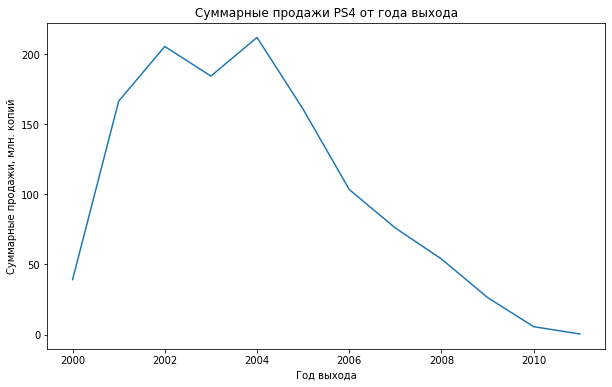

In [54]:
print(data.query('platform == "PS2"').groupby(by = 'year_of_release')['total_sales'].sum())
data.query('platform == "PS2"').groupby(by = 'year_of_release')['total_sales'].sum().plot(figsize = (10,6), title = 'Суммарные продажи PS4 от года выхода', xlabel = 'Год выхода', ylabel = 'Суммарные продажи, млн. копий'); # выводим диаграмму  для PS2

**Построим распределение платформы X360 по годам:** 

year_of_release
2005      8.25
2006     51.62
2007     95.41
2008    135.26
2009    120.29
2010    170.03
2011    143.84
2012     99.74
2013     88.58
2014     34.74
2015     11.96
2016      1.52
Name: total_sales, dtype: float64


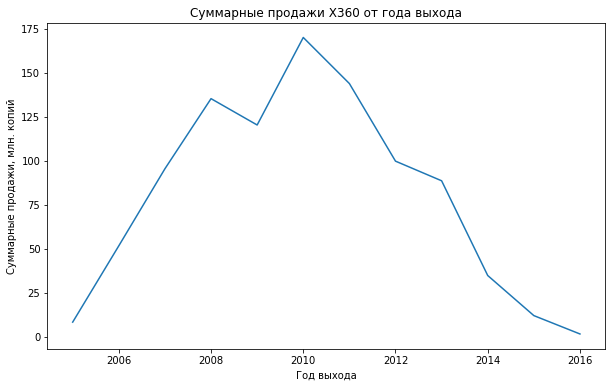

In [55]:
print(data.query('platform == "X360"').groupby(by = 'year_of_release')['total_sales'].sum())
data.query('platform == "X360"').groupby(by = 'year_of_release')['total_sales'].sum().plot(figsize = (10,6), title = 'Суммарные продажи X360 от года выхода', xlabel = 'Год выхода', ylabel = 'Суммарные продажи, млн. копий'); # выводим диаграмму рассеяния для X360

**Построим распределение платформы PS3 по годам:** 

year_of_release
2006     20.96
2007     73.19
2008    118.52
2009    130.93
2010    142.17
2011    156.78
2012    107.36
2013    113.25
2014     47.76
2015     16.82
2016      3.60
Name: total_sales, dtype: float64


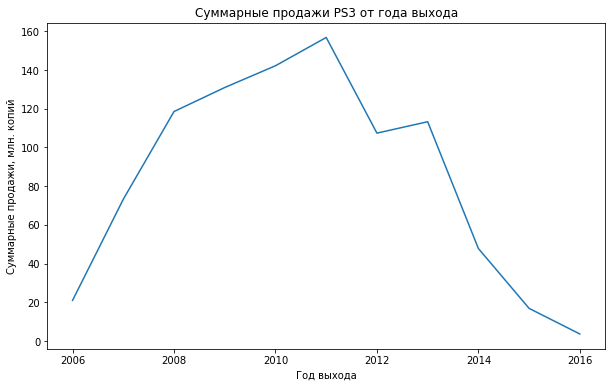

In [56]:
print(data.query('platform == "PS3"').groupby(by = 'year_of_release')['total_sales'].sum())
data.query('platform == "PS3"').groupby(by = 'year_of_release')['total_sales'].sum().plot(figsize = (10,6), title = 'Суммарные продажи PS3 от года выхода', xlabel = 'Год выхода', ylabel = 'Суммарные продажи, млн. копий'); # выводим диаграмму  для PS3

**Построим распределение платформы Wii по годам:** 

year_of_release
2006    137.15
2007    152.77
2008    171.32
2009    206.97
2010    127.95
2011     59.65
2012     21.71
2013      8.59
2014      3.75
2015      1.14
2016      0.18
Name: total_sales, dtype: float64


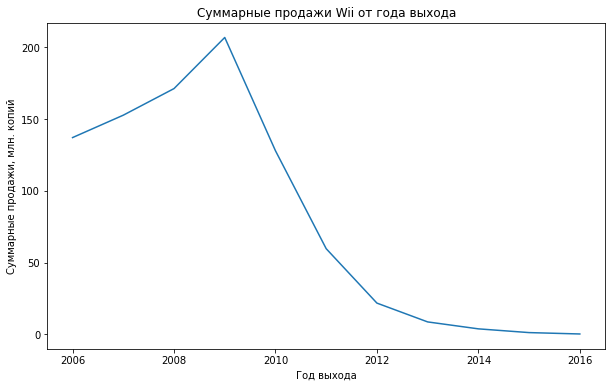

In [57]:
print(data.query('platform == "Wii"').groupby(by = 'year_of_release')['total_sales'].sum())
data.query('platform == "Wii"').groupby(by = 'year_of_release')['total_sales'].sum().plot(figsize = (10,6), title = 'Суммарные продажи Wii от года выхода', xlabel = 'Год выхода', ylabel = 'Суммарные продажи, млн. копий'); # выводим диаграмму  для Wii

**Из диаграмм видно, что у самых продаваемых платформ срок жизни не превышает 11 лет. По мере уменьшения продаваемости срок жизни ожидаемо сокращается. Для построения прогноза нужно знать ситуацию в предыдущий год и за пару лет до него, чтобы отследить динамику. Поэтому исключим из датафрейма строки с датой выхода игры раньше 2014 года:**

In [58]:
data = data.query('year_of_release >= 2014') # оставляем только платформы 2014 года и младше (пропусков в столбце нет)

**Выведем платформы с наибольшими суммарными продажами с 2014 года:**

In [59]:
data.groupby('platform')['total_sales'].sum().sort_values(ascending = False) #выводим таблицу

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64

**Создадим сводную таблицу для платформ по годам:**

In [60]:
platforms = data.pivot_table(columns = 'platform', index = 'year_of_release', values ='total_sales', aggfunc = 'sum') # создаем таблицу
platforms # выводим результат на экран

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


**Из таблицы видно, что на платформе PSP за 2016 год не вышло ни одной игры. Удалим эту платформу из рассмотрения:**

In [61]:
platforms = platforms.drop(columns = 'PSP') # удаляем стобцы
platforms # выводим результат на экран

platform,3DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,
2014,43.76,13.28,47.76,100.00,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,4.25,0.18,4.60,1.52,26.15


**Построим графики изменения суммы проданных копий от года:**

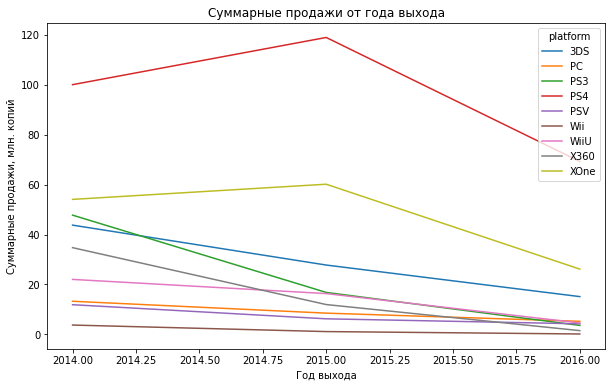

In [62]:
platforms.plot(figsize=(10,6),title = 'Суммарные продажи от года выхода', xlabel = 'Год выхода', ylabel = 'Суммарные продажи, млн. копий', use_index = 'year_of_release'); # строим графики

**Из диаграммы следует, что в 2016 году лидировали по продажам игры на платформах PS4, XOne и 3DS, я бы рассматривал именно их в качестве наиболее перспективных на 2017 год.
При этом общемировые продажи снижаются по всем платформам.**

**Построим график «ящик с усами» с выбросами по глобальным продажам игр в разбивке по платформам:**

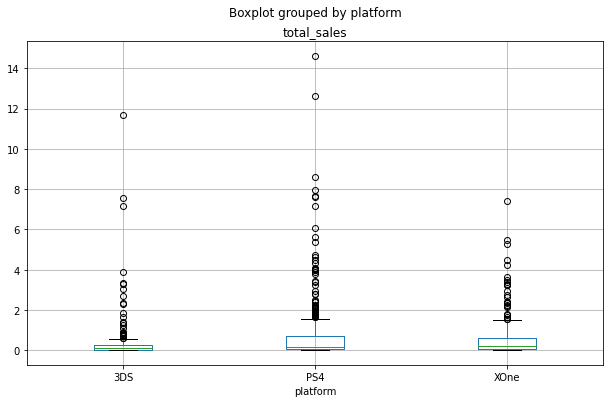

In [63]:
data.query('platform in ["PS4", "XOne", "3DS"]').boxplot(column='total_sales',by = 'platform', figsize = (10,6));

**Теперь, чтобы получше рассмотреть, уберём выбросы:**

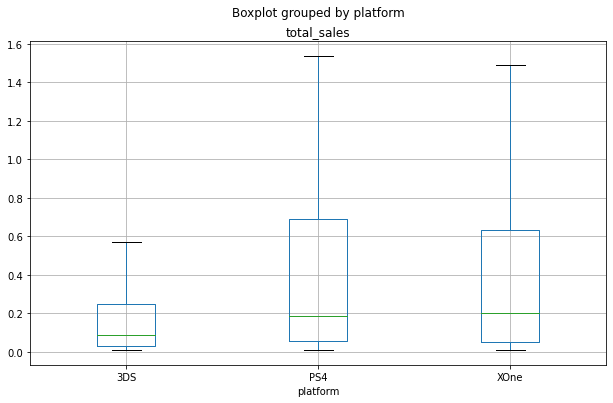

In [64]:
data.query('platform in ["PS4", "XOne", "3DS"]').boxplot(column='total_sales',by = 'platform', figsize = (10,6),showfliers=False);

**Из графиков для 3 выбранных платформ следует, что медианные значения продаж для игр на платформах PS4 и XOne значительно больше, чем на 3DS**

**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим матрицу диаграмм рассеяния:**

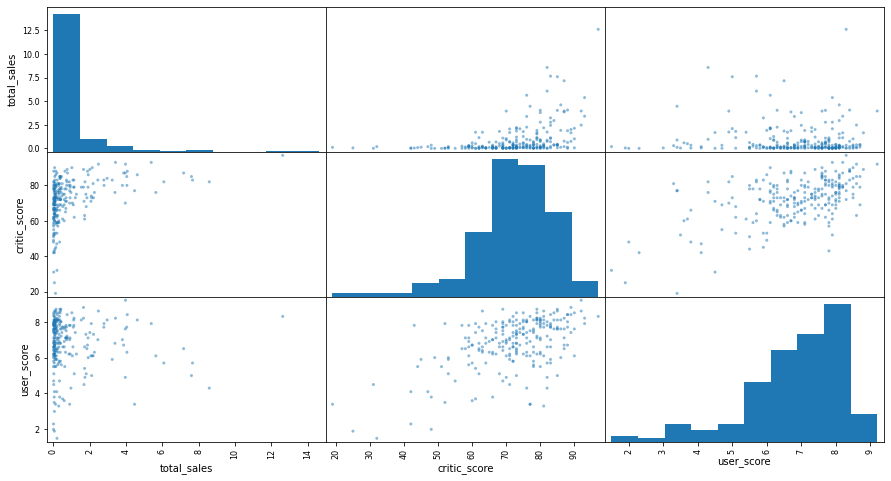

In [65]:
pd.plotting.scatter_matrix(data.query('platform == "PS4"')[['total_sales','critic_score','user_score']], figsize=(15, 8));

**Посчитаем корреляцию между отзывами и продажами:**

In [66]:
print (data.query('platform == "PS4"')[['total_sales','critic_score','user_score']].corr())

              total_sales  critic_score  user_score
total_sales      1.000000      0.402661   -0.040132
critic_score     0.402661      1.000000    0.546434
user_score      -0.040132      0.546434    1.000000


**Из матрицы корреляции следует, что между продажами игр на платформе PS4 и оценкой критиков есть слабая связь. Между продажами и оценкой пользователей связи практически нет.**

**Посмотрим, как влияют на продажи внутри платформы XOne отзывы пользователей и критиков. Построим матрицу диаграмм рассеяния:**

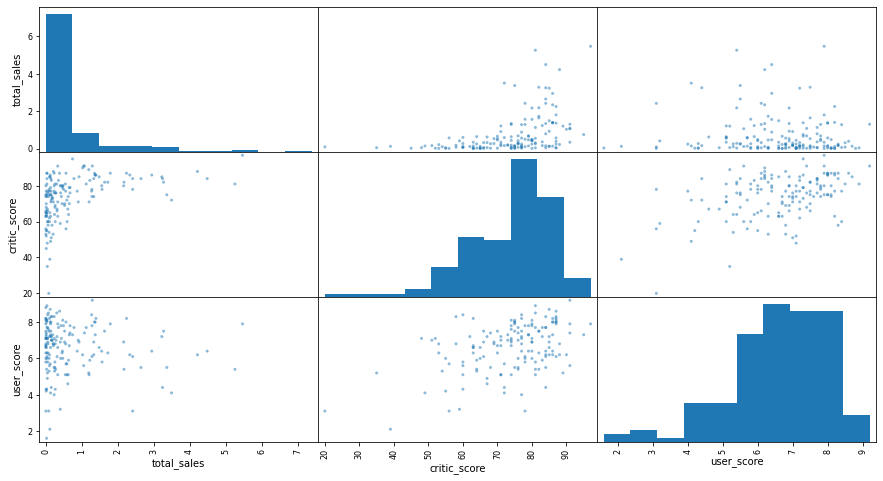

In [67]:
pd.plotting.scatter_matrix(data.query('platform == "XOne"')[['total_sales','critic_score','user_score']], figsize=(15, 8));

**Построим матрицу корреляции, для платформы XOne:**

In [68]:
print (data.query('platform == "XOne"')[['total_sales','critic_score','user_score']].corr())

              total_sales  critic_score  user_score
total_sales      1.000000      0.428677   -0.070384
critic_score     0.428677      1.000000    0.440977
user_score      -0.070384      0.440977    1.000000


**Из матрицы корреляции следует, что между продажами игр на платформе XOne и оценкой критиков есть слабая связь. Между продажами и оценкой пользователей связи практически нет. Очень похожая картина с PS4.**

**Посмотрим, как влияют на продажи внутри платформы 3DS отзывы пользователей и критиков. Построим матрицу диаграмм рассеяния:**

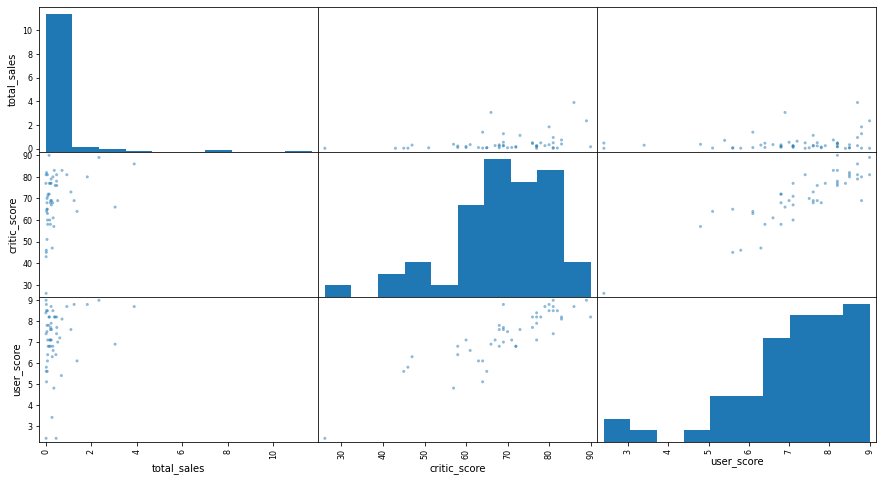

In [69]:
pd.plotting.scatter_matrix(data.query('platform == "3DS"')[['total_sales','critic_score','user_score']], figsize=(15, 8));

**Построим матрицу корреляции, для платформы 3DS:**

In [70]:
print (data.query('platform == "3DS"')[['total_sales','critic_score','user_score']].corr())

              total_sales  critic_score  user_score
total_sales      1.000000      0.314117    0.215193
critic_score     0.314117      1.000000    0.862485
user_score       0.215193      0.862485    1.000000


**Из матрицы корреляции следует, что между продажами игр на платформе 3DS и оценкой критиков есть очень слабая связь. Также есть очень слабая связь между продажами и оценкой пользователей.**

**Посмотрим на общее распределение игр по жанрам:**

genre
Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: total_sales, dtype: int64


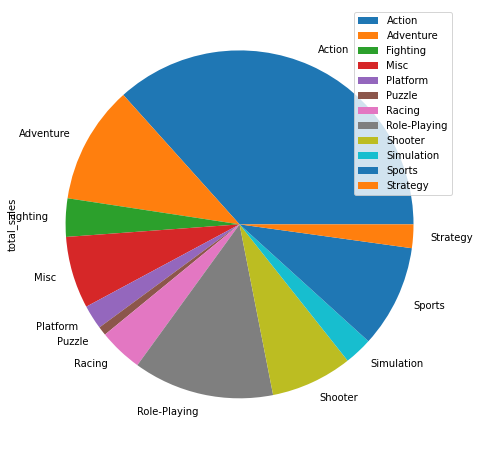

In [71]:
print (data.groupby('genre')['total_sales'].count().sort_values(ascending = False))
data.groupby('genre').count().plot(kind='pie', y='total_sales', figsize = (15,8));

**А теперь рассмотрим распределение продаж по жанрам:**

genre
Shooter         0.515
Sports          0.180
Platform        0.140
Fighting        0.125
Role-Playing    0.110
Simulation      0.100
Action          0.090
Misc            0.090
Racing          0.090
Strategy        0.060
Puzzle          0.045
Adventure       0.030
Name: total_sales, dtype: float64


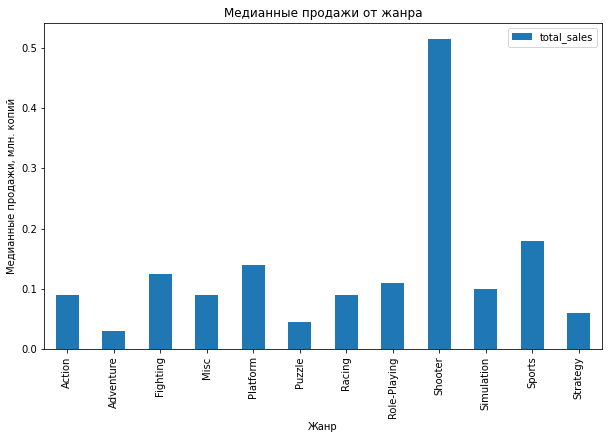

In [72]:
print (data.groupby('genre')['total_sales'].median().sort_values(ascending = False))
data.groupby('genre').median().plot(kind='bar', y='total_sales', figsize = (10,6), title = 'Медианные продажи от жанра', xlabel = 'Жанр', ylabel = 'Медианные продажи, млн. копий');

**Из диаграммы видно, что больше всего медианный доход у игр в жанрe Shooter, а меньше всего - в жанре Adventure.**

**Выводы к части 3:** 
   1. У самых продаваемых платформ срок жизни не превышает 11 лет. 
   2. По мере уменьшения продаваемости срок жизни ожидаемо сокращается.
   3. Для построения прогноза нужно знать ситуацию в предыдущий год и за пару лет до него, чтобы отследить динамику. Поэтому исключили из датафрейма строки с датой выхода игры раньше 2014 года.
   3. Платформа 'PSP' не была представлена в 2016 году, поэтому её тоже исключили из рассмотрения.
   4. В 2016 году лидировали по продажам игры на платформах PS4, XOne и 3DS, я бы рассматривал именно их в качестве наиболее перспективных на 2017 год.
   5. Общемировые продажи по всем платформам снизились в 2016 году.
   6. Медианные значения продаж для игр на платформах PS4 и XOne значительно больше, чем на 3DS.
   7.  Между продажами игр на платформе PS4 и оценкой критиков есть слабая связь. Между продажами и оценкой пользователей связи практически нет.
   8. Между продажами игр на платформе XOne и оценкой критиков есть слабая связь. Между продажами и оценкой пользователей связи практически нет. Очень похожая картина с PS4.
   9. Между продажами игр на платформе 3DS и оценкой критиков есть очень слабая связь. Также есть очень слабая связь между продажами и оценкой пользователей.
   10. Больше всего медианный доход у игр в жанрe Shooter, а меньше всего - в жанре Adventure. 

### Составим портрет пользователя каждого региона

**Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5):**

In [73]:
print ('NA')
print (data.groupby('platform')['na_sales'].sum().sort_values(ascending = False).head()) 

NA
platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64


In [74]:
print ('EU')
print (data.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).head()) 

EU
platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64


In [75]:
print ('JP')
print (data.groupby('platform')['jp_sales'].sum().sort_values(ascending = False).head()) 

JP
platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64


**Построим график зависимости суммарных продаж по регионам от платформы:**

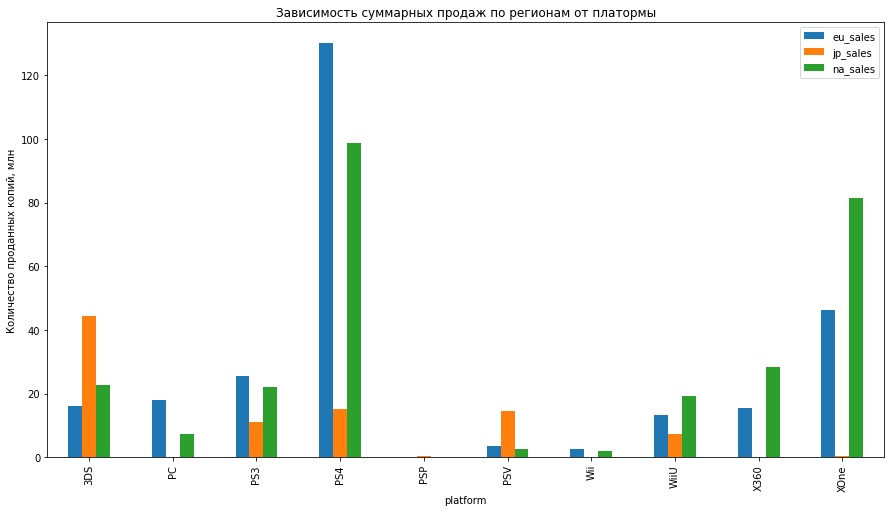

In [88]:
data.pivot_table(values = ['na_sales', 'eu_sales', 'jp_sales'], index = 'platform', aggfunc = 'sum' ).plot(figsize=(15,8), title = 'Зависимость суммарных продаж по регионам от платормы', kind='bar', ylabel = 'Количество проданных копий, млн');

**Топ-5 самых популярных платформ сильно зависит от региона.**

**Определим для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5):**

In [76]:
print ('NA')
print (data.groupby('genre')['na_sales'].sum().sort_values(ascending = False).head()) 

NA
genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64


In [77]:
print ('EU')
print (data.groupby('genre')['eu_sales'].sum().sort_values(ascending = False).head()) 

EU
genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64


In [79]:
print ('JP')
print (data.groupby('genre')['jp_sales'].sum().sort_values(ascending = False).head()) 

JP
genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float64


**Построим график зависимости суммарных продаж по регионам от жанра:**

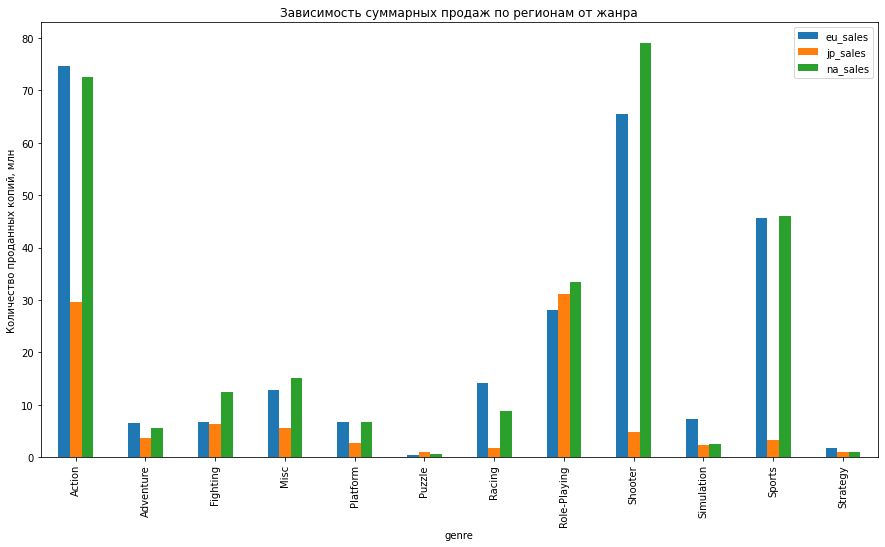

In [86]:
data.pivot_table(values = ['na_sales', 'eu_sales', 'jp_sales'], index = 'genre', aggfunc = 'sum' ).plot(figsize=(15,8), title = 'Зависимость суммарных продаж по регионам от жанра', kind='bar', ylabel = 'Количество проданных копий, млн');

**Топ-5 самых популярных жанров сильно зависит от региона. При этом распределения по жанрам на европейском и американском рынках очень похожи.**

**Оценим, влияет ли рейтинг ESRB на продажи в отдельном регионе. Для этого выведем следующую таблицу:**

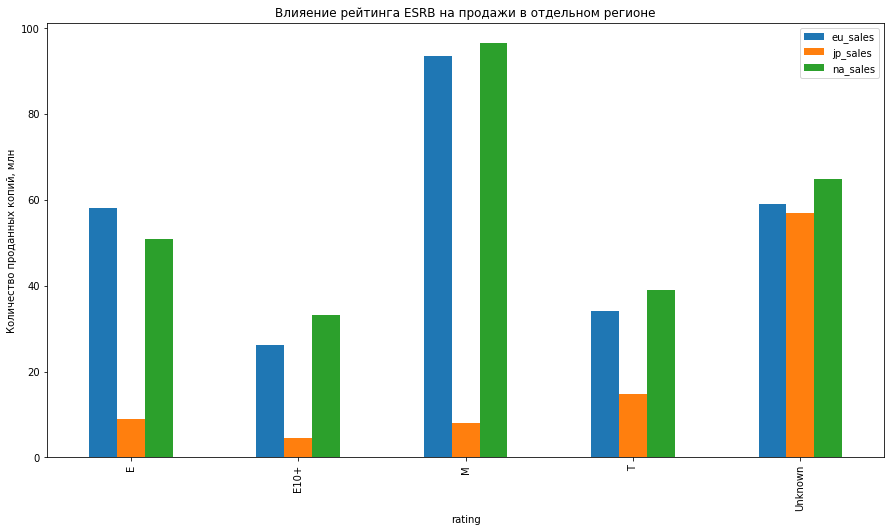

In [87]:
data.pivot_table(values = ['na_sales', 'eu_sales', 'jp_sales'], index = 'rating', aggfunc = 'sum' ).plot(figsize=(15,8),  kind='bar', title = 'Влияение рейтинга ESRB на продажи в отдельном регионе', ylabel = 'Количество проданных копий, млн');  

**Из графика следует, что во всех трёх регионах больше всего продано игр с рейтигом E, M и T. Макисмумы и минимумы наблюдаются в одних и тех же значениях рейтинга ESRB. При этом в Японии больше покупают игр с неизвестным рейтингом ESRB, чем в других регионах.**

**Выводы из части 4:**
   1. Топ-5 самых популярных платформ сильно зависит от региона.
   2. Топ-5 самых популярных жанров сильно зависит от региона. При этом распределения по жанрам на европейском и американском рынках очень похожи.
   3. Во всех трёх регионах больше всего продано игр с рейтигом E, M и T. Макисмумы и минимумы наблюдаются в одних и тех же значениях рейтинга ESRB. При этом в Японии больше покупают игр неизвестным рейтингом ESRB, чем в других регионах.

### Проверим гипотезы

**Проверим гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Нулевой гипотезой будет утверждение, что средние пользовательские рейтинги платформ Xbox One и PC равны. Альтернативной гипотезой будет то, что они не равны другу другу:**

In [269]:
from scipy import stats as st
st.ttest_ind(data.query('platform == "XOne"')['user_score'].dropna(), data.query('platform == "PC"')['user_score'].dropna(), equal_var = False)

Ttest_indResult(statistic=1.577760647447497, pvalue=0.11601398086668832)

**p-value больше общепринятого значения alpha 0.01, следовательно, нет оснований отвергать нулевую гипотезу. Принимаем верным утверждение: "Средние пользовательские рейтинги платформ Xbox One и PC равны"**

**Проверим гипотезу, что средние пользовательские рейтинги жанров Action и Sports разные. Нулевой гипотезой будет то, что средние пользовательские рейтинги жанров Action и Sports равны. Альтернативной гипотезой будет то, что они не равны другу другу:**

In [270]:
st.ttest_ind(data.query('genre == "Action"')['user_score'].dropna(), data.query('genre == "Sports"')['user_score'].dropna(), equal_var = False)

Ttest_indResult(statistic=8.384614718486121, pvalue=1.1825550382644557e-14)

**p-value меньше общепринятого значения alpha 0.01, следовательно, отвергаем нулевую гипотезу. То есть принимаем верным утверждение: "Средние пользовательские рейтинги жанров Action и Sports не равны друг другу (разные)".**  

**Выводы из части 5:**
   1. Средние пользовательские рейтинги платформ Xbox One и PC разные.
   2. Средние пользовательские рейтинги жанров Action и Sports тоже разные.
   3. Для проверки гипотез ипользовался метод о равенстве среднего двух генеральных совокупностей по взятым из них выборкам. Критерием оценки являлся результат сравнения p-value с alpha = 0.01. Поскольку выборки разного размера, параметр equal_var был установлен как False.

### Общий вывод: 
   1. В данных есть пропуски;
   2. На некоторых графиках видны несколько пиков, что требует более подробного анализа;
   3. Судя по большому размеру пустой области графиков, имеют место значения, сильно отличающиеся от большинства;
   4. Некоторые значения могли бы иметь другой тип данных по смыслу;
   5. Явные дубликаты в даннах отсутствуют;
   6. Были изменены названия столбцов (приведены к нижнему регистру);
   7. Были изменены типы данных в столбцах 'year_of_release' и 'user_score', так как годам больше подходит целый тип данных, а оценке пользователей - тип с плавающей запятой;
   8. В столбце 'user_score' содержались значения "tbd", что значит "To Be Determined" (будет определено). Поэтому прежде, чем изменять тип данных пришлось заменить эти значения на пропуски;
   9. Были удалены строки с пропущенными значениями в столбцах year_of_release, name и genre. Их удаление не должно повлиять на выводы, так как они составляют меньше 2% от общего числа строк, а в задании сказано: 'Не учитывайте в работе данные за предыдущие годы';
   10. Пропуски в столбцах critic_score, user_score решено оставить, так как их слишком много, и их заполнение может сильно исказить результат;
   11. В столбце ропуски в столбце rating заменены на "Unknown", так как рейтинг - признак категориальный, и пропуски можно считать еще одной категорией.
   12. Добавлен столбец с сумаррными продажами по всем регионам;
   13. У самых продаваемых платформ срок жизни не превышает 11 лет;
   14. По мере уменьшения продаваемости срок жизни ожидаемо сокращается.
   15. Для построения прогноза нужно знать ситуацию в предыдущий год и за пару лет до него, чтобы отследить динамику. Поэтому исключили из датафрейма строки с датой выхода игры раньше 2014 года.
   16. Платформа 'PSP' не была представлена в 2016 году, поэтому её тоже исключили из рассмотрения;
   17. В 2016 году лидировали по продажам игры на платформах PS4, XOne и 3DS, я бы рассматривал именно их в качестве наиболее перспективных на 2017 год.
   18. Общемировые продажи по всем платформам снизились в 2016 году;
   19. Медианные значения продаж для игр на платформах PS4 и XOne значительно больше, чем на 3DS;
   20. Между продажами игр на платформе PS4 и оценкой критиков есть слабая связь. Между продажами и оценкой пользователей связи практически нет;
   21. Между продажами игр на платформе XOne и оценкой критиков есть слабая связь. Между продажами и оценкой пользователей связи практически нет. Очень похожая картина с PS4.
   22. Между продажами игр на платформе 3DS и оценкой критиков есть очень слабая связь. Также есть очень слабая связь между продажами и оценкой пользователей.
   23. Больше всего медианный доход у игр в жанрe Shooter, а меньше всего - в жанре Adventure.
   24. Топ-5 самых популярных платформ сильно зависит от региона;
   25. Топ-5 самых популярных жанров сильно зависит от региона. При этом распределения по жанрам на европейском и американском рынках очень похожи;
   26. Вво всех трёх регионах больше всего продано игр с рейтигом E, M и T. Макисмумы и минимумы наблюдаются в одних и тех же значениях рейтинга ESRB. При этом в Японии больше покупают игр неизвестным рейтингом ESRB, чем в других регионах;
   27. Средние пользовательские рейтинги платформ Xbox One и PC равны.
   28. Средние пользовательские рейтинги жанров Action и Sports разные.
   29. Для проверки гипотез ипользовался метод о равенстве среднего двух генеральных совокупностей по взятым из них выборкам. Критерием оценки являляся результат сравнения p-value с alpha = 0.01.